In [10]:
# CREDIT: Megan McCarthy
# COMPILED: Brandon Ma

## This program reads from a local directory and selects files that has log.lammps extension and
## checks if a certain column exists before generating the data after said column is confirmed to exist
## before converting it to .csv along with the file stem taken from the file's name without having to do it manually.

import os, sys
import numpy as np
import matplotlib.pyplot as plt

all_the_log_files = [f for f in os.listdir() if f.endswith('.lammps') and not os.path.isdir(f)]

store_numpy_arrays = []

for log_file in all_the_log_files:
    file_stem = log_file.replace('.log.lammps','')

    ## get the text from the log file
    with open(log_file, 'r') as f:
        txt = f.readlines()

    col_check_str = 'Step          Temp         v_strain      v_sigmaxx      v_sigmayy'
    end_check_str = 'Loop time of '
    columns = None
    start_idx, end_idx = 0, len(txt)

    for line_idx, line in enumerate(txt):
        if col_check_str in line:
            columns = line.strip().split()
            start_idx = line_idx + 1
        if end_check_str in line and columns:
            end_idx = line_idx - 1

    ## PRINT DEBUG
    # print(columns)
    # print(start_idx,end_idx)
    # print(data0[-1:])

    data0 = txt[start_idx:end_idx]
    data = [row for row in data0]
    columns_entry = None
    
    ## write the CSV file
    csv_name = f'{file_stem}.csv'
    with open(csv_name, 'w') as f:
        f.write(",".join(columns) + "\n")
        for start_idx in data:
            columns_entry = start_idx.strip().split()
            f.write(",".join(columns_entry) + "\n")
    
    arr = np.array([[float(element) for element in row.split()] for row in data0])
    store_numpy_arrays.append(arr)
    

/tmp/ipykernel_1946457/2097784525.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array([[float(element) for element in row.split()] for row in data0])


In [43]:
    ## Attempt to test plot block for for loop to get all csv files
    ## THIS ISN'T WORKING

#     ssc = store_numpy_arrays[0] ## stress strain curve array
#     print(ssc[0,:])
#     col_strain = ssc[:,2]
#     col_sigmaxx = ssc[:,3] 
#     col_sigmayy = ssc[:,4] 
#     col_sigmazz = ssc[:,5] 
#     # print(col_strain)
#     # print(col_sigmaxx)
#     # print(col_sigmayy)
#     # print(col_sigmazz)
    
#     for subrows in ssc:
#         fig, axes = plt.subplots(subrows, 3, figsize=[15,6])
#         for subcolumns in subrows:
#             axes[int(subrows),int(subcolumns)].plot(col_strain, col_sigmaxx,label="sigma_xx",c="k")
#             axes[int(subrows),int(subcolumns)].plot(col_strain, col_sigmayy,label="sigma_yy",c="r")
#             axes[int(subrows),int(subcolumns)].plot(col_strain, col_sigmazz,label="sigma_zz",c="b")
    
#     ## in normal script, you'll need to have this uncommented:
#     plt.show()
#     plt.close()

[5.0000e-05 1.0000e-04 1.5000e-04 ... 3.9735e-01 3.9740e-01 3.9745e-01]
[ 0.00699754 -0.00453681 -0.00193867 ... -0.0023322  -0.005551
  0.01088059]
[-0.0107939   0.01686764 -0.00555318 ... -0.00478343 -0.00128111
  0.00065746]
[-0.14897622 -0.04955034 -0.04108217 ...  0.00590115 -0.06091345
 -0.0674213 ]


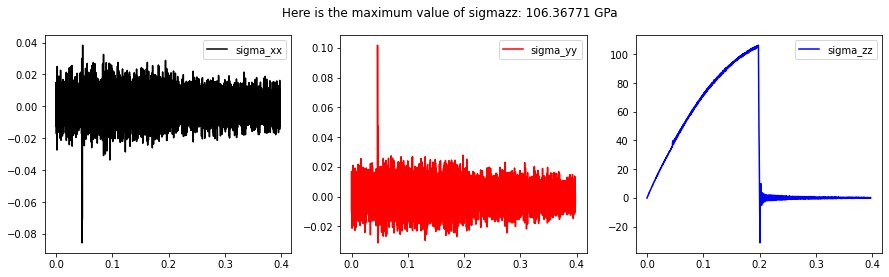

In [7]:
## test plot block for a figure with 1 row of 3 columns (axes is a list [axis1, axis2, axis3]

ssc = store_numpy_arrays[0] ## stress strain curve array

col_strain = ssc[:,2]
col_sigmaxx = ssc[:,3] 
col_sigmayy = ssc[:,4] 
col_sigmazz = ssc[:,5] 
print(col_strain)
print(col_sigmaxx)
print(col_sigmayy)
print(col_sigmazz)

fig, axes = plt.subplots(1,3, figsize=[15,4])

axes[0].plot(col_strain, col_sigmaxx,label="sigma_xx",c="k")
axes[1].plot(col_strain, col_sigmayy,label="sigma_yy",c="r")
axes[2].plot(col_strain, col_sigmazz,label="sigma_zz",c="b")

max_sigmazz = np.max(col_sigmazz)
fig_info = f"Here is the maximum value of sigmazz: {max_sigmazz} GPa"

[a.legend() for a in axes]

fig.suptitle(fig_info)

png_name = f"sigma_plots_colored_pretty_nice.png"
plt.savefig(png_name, transparent=True)

## in normal script, you'll need to have this uncommented:
plt.show()
plt.close()

[ 1.0000000e+02  2.9940464e+02  5.0000000e-05  6.9975359e-03
 -1.0793900e-02 -1.4897622e-01 -4.1483015e+04  2.1777102e+02
  9.8583480e+01  9.8591151e+01  2.7260924e+02  2.6496143e+06
  1.7444841e+01  5.0769769e+04]


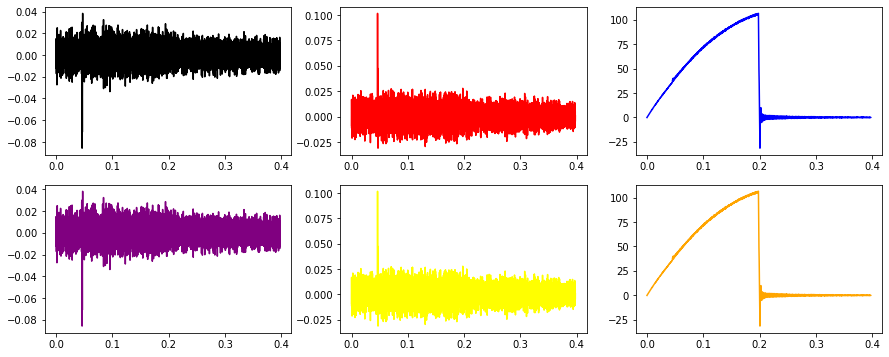

In [3]:
## test plot block for a figure with 1 row of 3 columns 
## (axes is a 2D matrix 
## [[axis1, axis2, axis3],
##  [axis4, axis5, axis6]] 

ssc = store_numpy_arrays[0] ## stress strain curve array
print(ssc[0,:])
col_strain = ssc[:,2]
col_sigmaxx = ssc[:,3] 
col_sigmayy = ssc[:,4] 
col_sigmazz = ssc[:,5] 
# print(col_strain)
# print(col_sigmaxx)
# print(col_sigmayy)
# print(col_sigmazz)

fig, axes = plt.subplots(2,3, figsize=[15,6])

axes[0,0].plot(col_strain, col_sigmaxx,label="sigma_xx",c="k")
axes[0,1].plot(col_strain, col_sigmayy,label="sigma_yy",c="r")
axes[0,2].plot(col_strain, col_sigmazz,label="sigma_zz",c="b")

axes[1,0].plot(col_strain, col_sigmaxx,label="sigma_xx",c="purple")
axes[1,1].plot(col_strain, col_sigmayy,label="sigma_yy",c="yellow")
axes[1,2].plot(col_strain, col_sigmazz,label="sigma_zz",c="orange")

## in normal script, you'll need to have this uncommented:
# plt.show()
# plt.close()

IndentationError: unexpected indent (3098720133.py, line 6)